# Final Project

By Shreya Majumdar and Bisola Okunola

# Summary of Dataset
The dataset contains instances of hourly averaged responses from an array of 5 metal oxide chemical sensors embedded in an Air Quality Chemical Multisensor Device. The device was located on the field in a significantly polluted area, at road level, within an Italian city. The data was recorded from March 2004 to February 2005 (one year) representing the longest freely available recordings of on field deployed air quality chemical sensor devices responses. Ground Truth hourly averaged concentrations for CO, Non Metanic Hydrocarbons, Benzene, Total Nitrogen Oxides (NOx) and Nitrogen Dioxide (NO2) were provided by a co-located reference certified analyzer. The dataset contains information about the daily concentrations of metal oxides, temperature, relative humidity, and absolute humidity in this Italian city. 

# Data Cleaning

In [147]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [149]:
df = pd.read_csv("AirQualityUCI/AirQualityUCI.csv", delimiter=";")
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


Key issues from dataset that need to be resolved in data cleaning:
1. Removing unnecessary columns

2. Date and time are recorded separate, but it is more efficient to track them in one column

3. Missing values in rows

    a. Missing dates or times
    
    b. Other missing values

4. Poorly formatted columns

5. Odd values in numerical columns

In [150]:
#1. Removing unecessary columns
#The original dataset has two columns with missing values at the end. These are not helpful, so let's
#remove them
df = df[["Date", "Time", "CO(GT)", "PT08.S1(CO)", "NMHC(GT)", "C6H6(GT)", "PT08.S2(NMHC)", "NOx(GT)", "PT08.S3(NOx)", "NO2(GT)", "PT08.S4(NO2)", "PT08.S5(O3)", "T", "RH", "AH"]]
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578"
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255"
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502"
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867"
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888"


In [151]:
#2. Combine date and time columns into one column of datetime objects
df["Datetime"] = pd.to_datetime(df['Date'] + df['Time'], format="%d/%m/%Y%H.%M.%S")
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Datetime
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",2004-03-10 18:00:00
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",2004-03-10 19:00:00
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",2004-03-10 20:00:00
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",2004-03-10 21:00:00
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",2004-03-10 22:00:00


In [152]:
#3a. Missing dates or times
#It is difficult to determine what day the data would be given to be, so if the number of missing days is 
# small enough, we should just remove those days.
print("Fraction of missing dates: " + str(len(df[df['Datetime'].isna()])/len(df)))
print("Length of data set: " + str(len(df)))

#since only about 1% of the data out of 9471 observations have missing dates, we will just remove these rows
#from our data

Fraction of missing dates: 0.012036743744060817
Length of data set: 9471


In [153]:
#3b. Other missing values
#We can also note that any row with missing values also has their Datetime column as missing
#To see why, we can check to see that the statement below is true
len(df[df['Datetime'].notna()]) - len(df.dropna(how = "any")) == 0

True

In [154]:
#since the above statement is true, we can see that removing all any missing values from our data
#will remove 1% of the data
df = df.dropna(how = "any")
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Datetime
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",2004-03-10 18:00:00
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",2004-03-10 19:00:00
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",2004-03-10 20:00:00
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",2004-03-10 21:00:00
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",2004-03-10 22:00:00


In [155]:
#4. Poorly formatted columns
#Many columns hold numerical, decimal data. Perhaps due to a different system of writing numbers, these
#commas are written with a comma instead of decimal point. As a result, they are interepreted as strings
#instead of numbers, making working with these columns difficult. We will reformat these columns into 
#float columns

In [156]:
df.dtypes

Date                     object
Time                     object
CO(GT)                   object
PT08.S1(CO)             float64
NMHC(GT)                float64
C6H6(GT)                 object
PT08.S2(NMHC)           float64
NOx(GT)                 float64
PT08.S3(NOx)            float64
NO2(GT)                 float64
PT08.S4(NO2)            float64
PT08.S5(O3)             float64
T                        object
RH                       object
AH                       object
Datetime         datetime64[ns]
dtype: object

In [157]:
#change ',' decimal format to '.' decimal format and then turn str column into float column
df['CO(GT)'] = df['CO(GT)'].str.replace(',','.')
df['CO(GT)'] = df['CO(GT)'].astype(float)
df['C6H6(GT)'] = df['C6H6(GT)'].str.replace(',','.')
df['C6H6(GT)'] = df['C6H6(GT)'].astype(float)
df['T'] = df['T'].str.replace(',','.')
df['T'] = df['T'].astype(float)
df['RH'] = df['RH'].str.replace(',','.')
df['RH'] = df['RH'].astype(float)
df['AH'] = df['AH'].str.replace(',','.')
df['AH'] = df['AH'].astype(float)
df.dtypes


Date                     object
Time                     object
CO(GT)                  float64
PT08.S1(CO)             float64
NMHC(GT)                float64
C6H6(GT)                float64
PT08.S2(NMHC)           float64
NOx(GT)                 float64
PT08.S3(NOx)            float64
NO2(GT)                 float64
PT08.S4(NO2)            float64
PT08.S5(O3)             float64
T                       float64
RH                      float64
AH                      float64
Datetime         datetime64[ns]
dtype: object

In [158]:
#5. Odd values in numerical columns
#-200 appears to be a default value in the numerical columns because extreme negative values do not make sense for concentration or temperature in Celsius.
#We need to replace them

In [159]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=-200, strategy='median')
numerical_list = ["CO(GT)", "PT08.S1(CO)", "NMHC(GT)", "C6H6(GT)", "PT08.S2(NMHC)", "NOx(GT)", "PT08.S3(NOx)", "NO2(GT)", "PT08.S4(NO2)", "PT08.S5(O3)", "T", "RH", "AH"]

df_numerical = df[numerical_list]
imp.fit(df_numerical)
df_numerical = pd.DataFrame(imp.transform(df_numerical), columns = numerical_list)
df[numerical_list] = df_numerical

# Data Visualization

According to our heatmap, we see that there is a strong, positive correlation with the concentrations of metal oxides such as PT08.61(CO), C6H6 (GT) and temperature, relative humidity, and absolute humidity. This indicates that it is likely that increased metal oxide concentrations in this Italian city may cause have caused affected the the weather of the environment. In the 3d scatterplot, we also notice that as the concentrations of metal oxides increase, then so does the temperature of the city, indicating a correlation between high levels of metal oxides and increased temperature. 

In our time series plots, we also see that the metal oxide concentartions, temperature, relative humidity, and absolute humidity, tend to follow the same trend in this city. For example, wee see dips in temperature, relative humidity, and absolute humidity, around the same times that we see dips in the concentartionof these metal oxides. The curves depicted by our time series plots indicate that weather changes in this city occur when changes in metal oxide concentrations occur.

<function matplotlib.pyplot.show(close=None, block=None)>

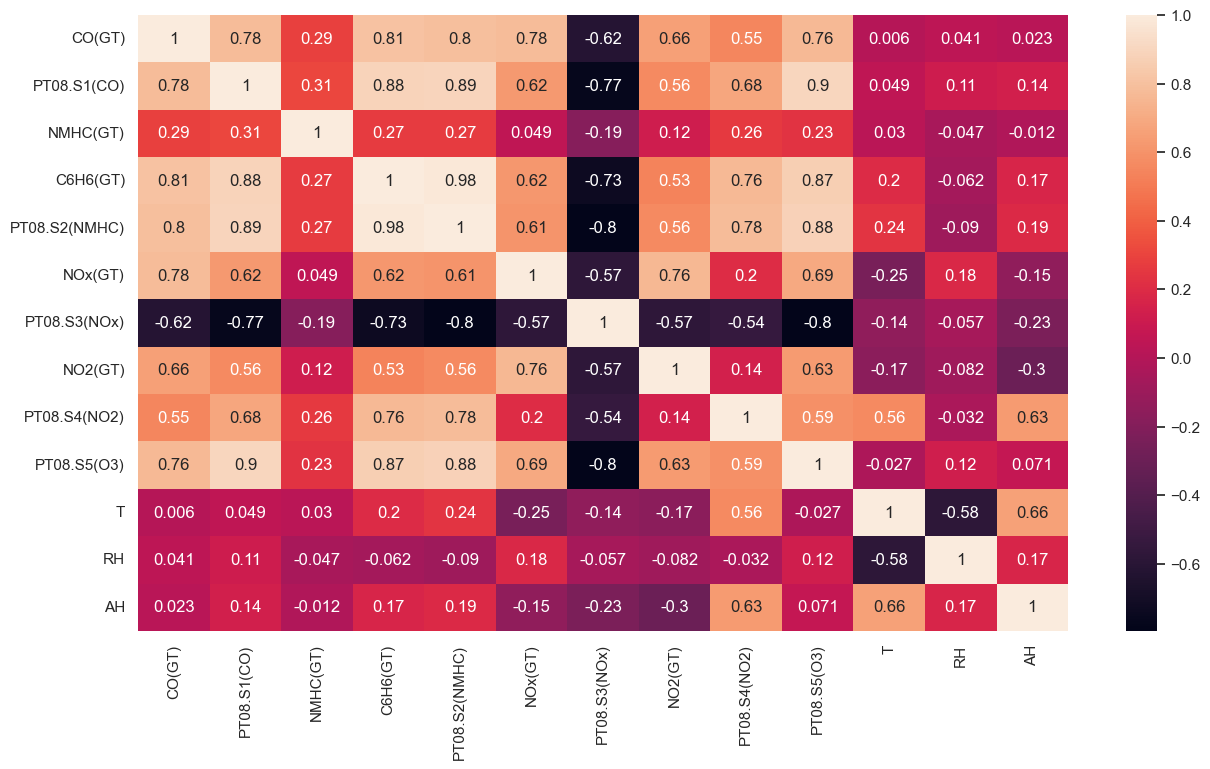

In [160]:
airCorr = df.corr()
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(airCorr, annot = True)
plt.show

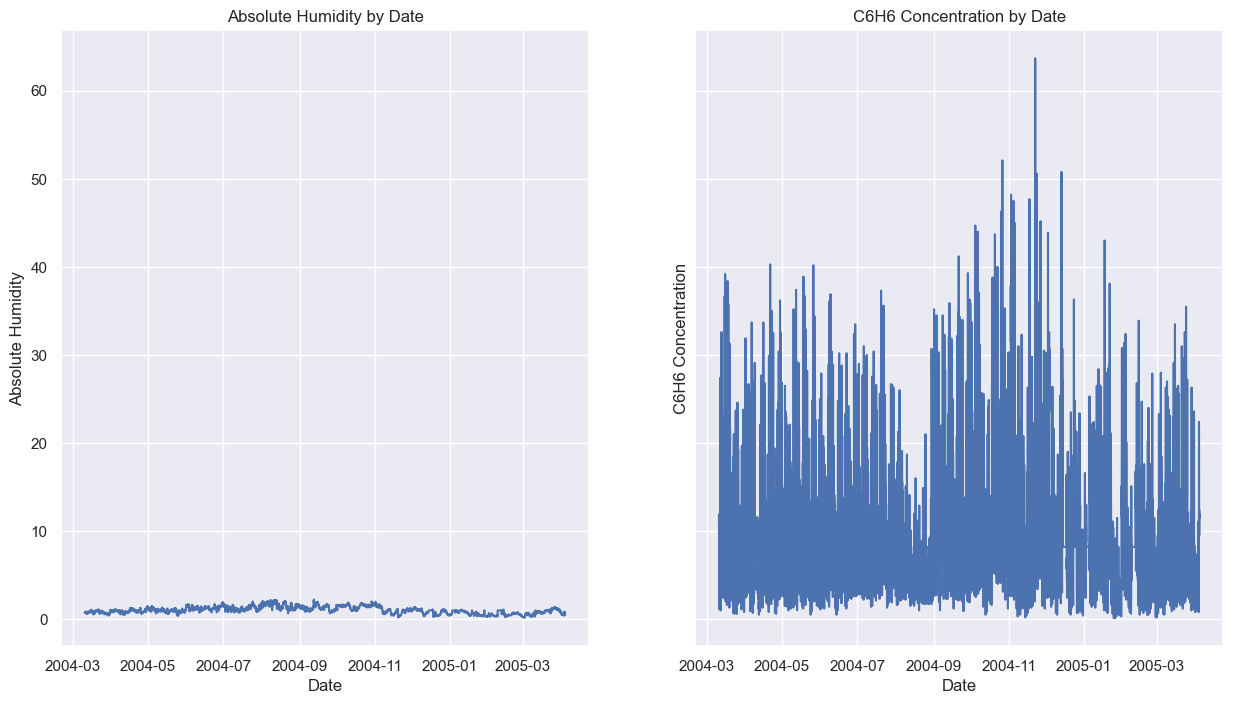

In [161]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(df['Datetime'], df['AH'])
ax2.plot(df['Datetime'], df['C6H6(GT)'])
ax1.set_xlabel('Date')
ax2.set_xlabel('Date')
ax1.set_ylabel('Absolute Humidity')
ax2.set_ylabel('C6H6 Concentration')
ax1.set_title('Absolute Humidity by Date')
ax2.set_title('C6H6 Concentration by Date')
plt.show()

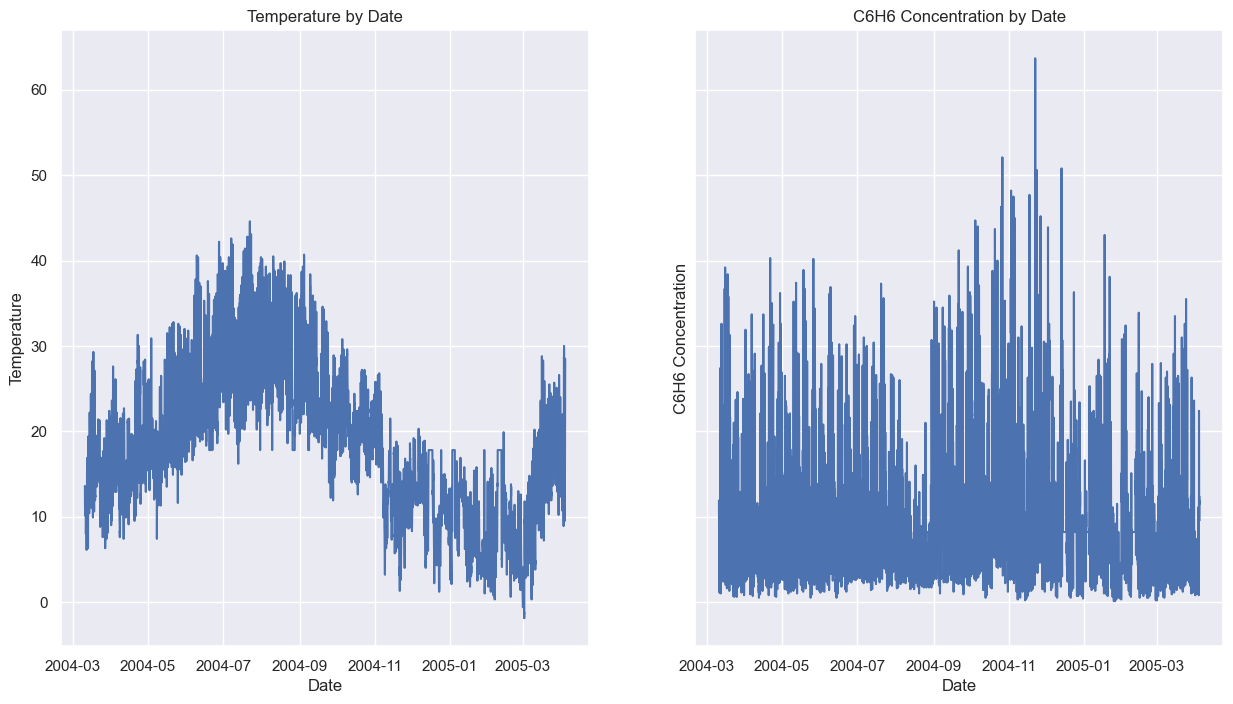

In [162]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(df['Datetime'], df['T'])
ax2.plot(df['Datetime'], df['C6H6(GT)'])
ax1.set_xlabel('Date')
ax2.set_xlabel('Date')
ax1.set_ylabel('Temperature')
ax2.set_ylabel('C6H6 Concentration')
ax1.set_title('Temperature by Date')
ax2.set_title('C6H6 Concentration by Date')
plt.show()

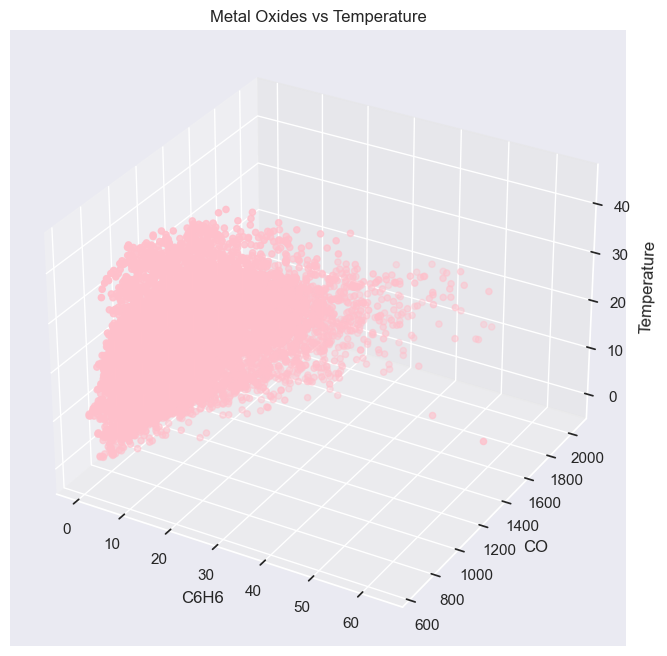

In [163]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')

ax.scatter(df['C6H6(GT)'],df['PT08.S1(CO)'], df['T'], c='pink')

ax.set_title('Metal Oxides vs Temperature')
ax.set_xlabel('C6H6')
ax.set_ylabel('CO')
ax.set_zlabel('Temperature')

plt.show()

Text(0.5, 1.0, 'Change in C6H6 concentrations')

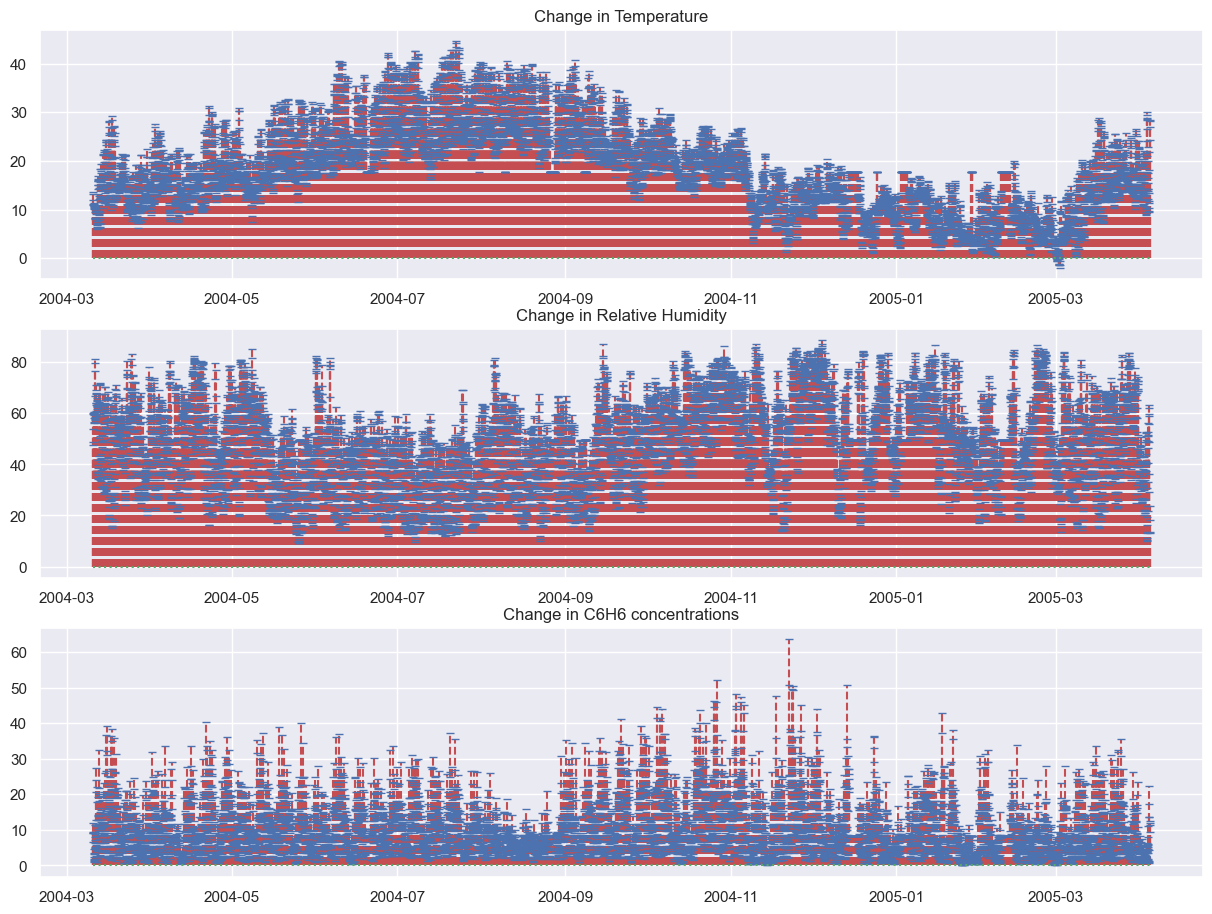

In [164]:
plt.figure(figsize = (15,11))
plt.subplot(311)
plt.stem(df['Datetime'], df['T'], markerfmt= 'b_',  linefmt= 'r--', basefmt= 'g:')
plt.title('Change in Temperature')

plt.subplot(312)
plt.stem(df['Datetime'], df['RH'],  markerfmt= 'b_', linefmt= 'r--', basefmt= 'g:')
plt.title('Change in Relative Humidity')

plt.subplot(313)
plt.stem(df['Datetime'], df['C6H6(GT)'], markerfmt= 'b_',  linefmt= 'r--', basefmt= 'g:')
plt.title('Change in C6H6 concentrations')

# Model 1: Linear Regression

Question: Is there a relationship between metal oxide concentration in the air and temeperature, relative humidity, and absolute humidity?

The training scores for the Linear Regression model to predict temperature, relative humidity, and absolute humidity from the level of metal oxide concentrations are low, with these scores ranging from 0.28 to 0.58. This indicates that our model has not learned to fit the data with great accuracy. Thus, there may exist a correlation between the levels of these metal oxide concentrations and temperature, relative humidity, and asbolute humidity in this Italian city, but the model is not able to fully capture it yet. 

Furthermore, we also have  K-Fold cross validation scores that ranges from 0.3 to 0.59. These means that for metal oxide contentrations vs temperature, our model has an average accuracy of 59% on all K-Fold subsets, for metal oxide contentrations vs absolute humidity, a 29% accuracy on all K-Fold subsets, and for metal oxide contentrations vs relative humidity, an 58% average accuracy on all K-Fold subsets. These scores denote that our models are not overfitting to the training data and can thus be improved to generalize well to new data that hasn't been seen before. 

Overall, these scores suggest that the linear regression model is a viable route, but requires further improvement to perform well on the current data set and make accurate predictions on new data involving the relationship between metal oxide concentrations and temperature, absolute humidity, and relative humidity, in this Italian city. 

In [165]:
#Predict temperature using metal oxide concentration
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
metal_oxides = ['PT08.S1(CO)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'PT08.S4(NO2)', 'PT08.S5(O3)']
X = df[metal_oxides] #these are the mostly uncorrelated featues to prevent issues with multicollinearity
y = df['T']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)
model = LinearRegression()
model.fit(X_train, y_train)
print('Temperature training score: ', model.score(X_train, y_train))

#5-fold cross validation
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_test, y_test, scoring='r2', cv=5)
print("Temperature Linear Regression Model Accuracy using k-fold cross validation: " + str(np.mean(scores)))   

Temperature training score:  0.5878201329735678
Temperature Linear Regression Model Accuracy using k-fold cross validation: 0.586847565056812


In [166]:
#Predict relative humidity using metal oxide concentration
X_rh = df[metal_oxides] #these are the mostly uncorrelated featues to prevent issues with multicollinearity
y_rh = df['RH']

Xrh_train, Xrh_test, yrh_train, yrh_test = train_test_split(X_rh, y_rh, test_size = 0.2)
model_rh = LinearRegression()
model_rh.fit(Xrh_train, yrh_train)
print('Relative humidity training score: ', model_rh.score(Xrh_train, yrh_train))

scores_rh = cross_val_score(model_rh, Xrh_test, yrh_test, scoring='r2', cv=5)
print("Linear Regression Model using k-fold cross validation: " + str(np.mean(scores_rh)))   

Relative humidity training score:  0.2827318391461935
Linear Regression Model using k-fold cross validation: 0.3075742197555862


In [167]:
#Predict absolute humidity using metal oxide concentration
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_ah = df[metal_oxides] #these are the mostly uncorrelated featues to prevent issues with multicollinearity
y_ah = df['AH']

Xah_train, Xah_test, yah_train, yah_test = train_test_split(X,y,test_size = 0.2, random_state = 1998) # only look at Petal Length
model_ah = LinearRegression()
model_ah.fit(X_train, y_train)
print('Training score: ', model_ah.score(Xah_train, yah_train))

scores_rh = cross_val_score(model_ah, Xah_test, yah_test, scoring='r2', cv=5)
print("Linear Regression Model using k-fold cross validation: " + str(np.mean(scores_rh)))   

Training score:  0.5876778405749212
Linear Regression Model using k-fold cross validation: 0.5889077792063068


# Models 2 and 3: Decision Tree and K-Nearest Neighbors

Question: Can metal oxide concentrations (Tin Oxide, Titania, Tungsten Oxide, and Indium Oxide) be used to predict the carbon monoxide level?

In this section, we looking to see if we can predict the level of carbon monoxide using metal oxide concentrations. Because we are looking at carbon monoxide levels (low, medium, high), we will use classifiers. Measuring carbon monoxide levels is important because sustained levels of carbon monoxide above 9 mg/m^3 can pose serious health issues for people living in this Italian city.

In running both the decision tree and the k-nearest neighbors, we get high levels of accuracy in the predictions. In running a k-fold cross validation on the decision tree with a max depth of 2, the accuracy comes out to be 0.97, and running a k-fold cross validation on the k-nearest neighbors, the accuracy comes out to be 0.97 as well. High levels of accuracy indicate that this model is performing well.

In [168]:
#create levels for carbon monoxide concentration
#0 corresponds to a low level of carbon monoxide between 0 and 5 mg/m^, 
#1 corresponds to a medium level of carbon monoxide between 5 and 9 mg/m^3,
#and 2 corresponds to a high level of carbon monoside between 9 and 12 mg/m^3
CO_GT_Levels = pd.cut(df['CO(GT)'], bins=[0, 5, 9, 12], include_lowest=True, labels=[0,1,2])
df["CO(GT) Levels"] = CO_GT_Levels
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Datetime,CO(GT) Levels
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,2004-03-10 18:00:00,0
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,2004-03-10 19:00:00,0
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,2004-03-10 20:00:00,0
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,2004-03-10 21:00:00,0
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,2004-03-10 22:00:00,0


In [169]:
#Model 2: Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
X_classfier = df[metal_oxides]
y_classifier = df['CO(GT) Levels']
incX = X_classfier
incY = y_classifier

#Xc_train, Xc_test, yc_train, yc_test = train_test_split(X_classfier, y_classifier ,test_size = 0.2)
best_depth = 1
best_accuracy = 0
best_acc_tr = 0
for k in range(1, 100):
    model = DecisionTreeClassifier(max_depth = k)
    #model.fit(Xc_train, yc_train)

    kf = KFold(n_splits=5)
    errors = 0
    scorelist_train = []
    scorelist_test = []

    for train_index, test_index in kf.split(incX):
        Xc_train = incX.iloc[train_index]
        yc_train = incY.iloc[train_index]
        Xc_test = incX.iloc[test_index]
        yc_test = incY.iloc[test_index]
        
        model.fit(Xc_train, yc_train)
        dtree_pred_train = model.predict(Xc_train)
        dtree_pred_test = model.predict(Xc_test) 
        #print("Test Accuracy: ", accuracy_score(yc_test, dtree_pred_test))
        scorelist_train.append(accuracy_score(yc_train, dtree_pred_train))
        scorelist_test.append(accuracy_score(yc_test, dtree_pred_test))

    acc_train = np.mean(scorelist_train)
    acc_test = np.mean(scorelist_test)

    if acc_test > best_accuracy:
        best_accuracy = acc_test
        best_acc_tr = acc_train
        best_depth = k
print('Best Depth is: ', best_depth)
print('Best train accuracy is: ', best_acc_tr)
print('Best test accuracy is: ', best_accuracy)

Best Depth is:  2
Best train accuracy is:  0.9759269398178315
Best test accuracy is:  0.9727445901684277


In [170]:
#Model 3: K-Nearest  Neighbors
from sklearn.neighbors import KNeighborsClassifier
incX2 = X_classfier
incY2 = y_classifier

#Xc_train, Xc_test, yc_train, yc_test = train_test_split(X_classfier, y_classifier ,test_size = 0.2)
best_accuracy2 = 0
best_acc_tr2 = 0
best_split = k

knn = KNeighborsClassifier()
for k in range(2, 10):
    kf = KFold(n_splits=k)
    scorelist_train2 = []
    scorelist_test2 = []

    for train_index, test_index in kf.split(incX):
        Xc_train2 = incX2.iloc[train_index]
        yc_train2 = incY2.iloc[train_index]
        Xc_test2 = incX2.iloc[test_index]
        yc_test2 = incY2.iloc[test_index]
        
        knn.fit(Xc_train2, yc_train2)
        knn_pred_train = knn.predict(Xc_train2)
        knn_pred_test = knn.predict(Xc_test2) 
        #print("Test Accuracy: ", accuracy_score(yc_test, dtree_pred_test))
        scorelist_train2.append(accuracy_score(yc_train2, knn_pred_train))
        scorelist_test2.append(accuracy_score(yc_test2, knn_pred_test))

    acc_train2 = np.mean(scorelist_train2)
    acc_test2 = np.mean(scorelist_test2)

    if acc_test2 > best_accuracy2:
        best_accuracy2 = acc_test2
        best_acc_tr2 = acc_train2
        best_split = k
print('Best split is: ', best_split)
print('Best train accuracy is: ', best_acc_tr2)
print('Best test accuracy is: ', best_accuracy2)

Best split is:  3
Best train accuracy is:  0.9815646040397564
Best test accuracy is:  0.9740301378647002


# Improvements on Model 1
It is possible that the relationship between metal oxide conscentrations and temperature, relative humidity, and absolute humidity may not be completely linear, so a way to improve this model would be to look closely at the trends that the data depicts to possibly see if a non-linear model better represents this data. As we dealt with removing missing values in our data cleaning process, removing outliers and transforming variables could be considered. However, we would have to be careful about this, since this could lead to a loss of valuable information. Removing outliers may result in a biased picture of the data that may lead to erroneous conclusions. On the other hand, it may actually improve the accuracy of our model as some extreme values may not be a good representation of the data as they may have been collected on unusual days or due to errors in measurement or even errors in data entry. We could also try different models such as random forests, and decision trees and compare their performance with that of the Linear regression model to identify the best model to represent this data. 


To improve the accuracy of the model, we will begin by doing a multicollinearity analysis on the features to see if any should be removed to improve the accuracy.

<function matplotlib.pyplot.show(close=None, block=None)>

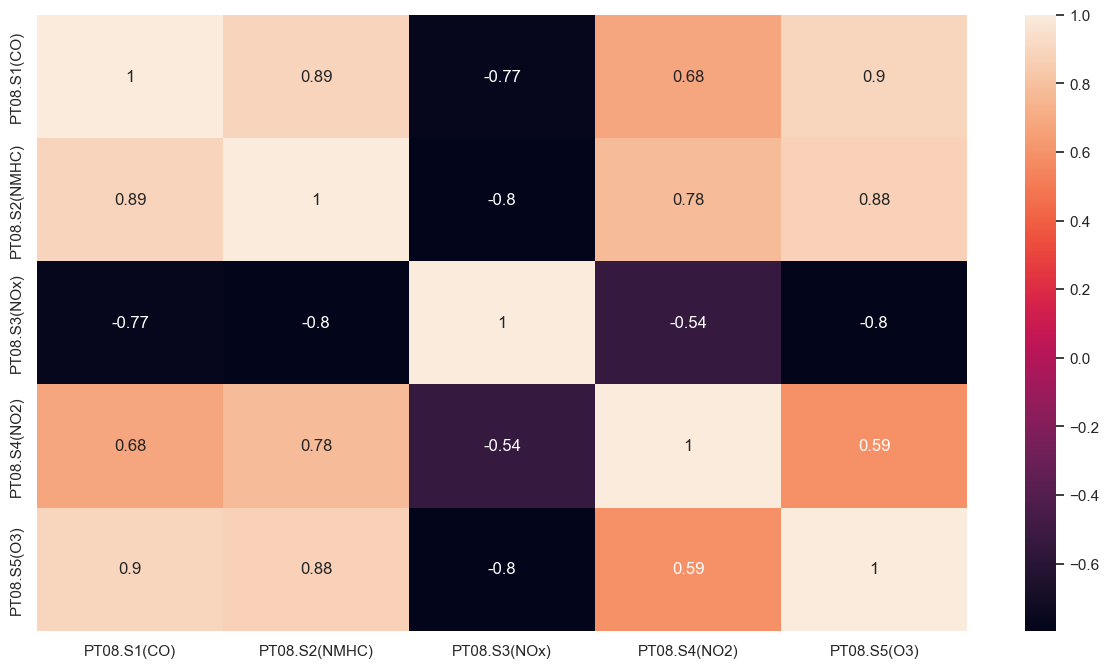

In [171]:
#correlations of metal oxide concentrations
metalCorr = df[metal_oxides].corr()
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(metalCorr, annot = True)
plt.show

In [172]:
#All of these variables appear to have a strong correlation, so let us try fitting one a time an seeing if an improvement occurs
metal_oxides_new = ['PT08.S1(CO)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'PT08.S4(NO2)']
X = df[metal_oxides_new]
y = df['T']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)
model = LinearRegression()
model.fit(X_train, y_train)
print('Temperature training score: ', model.score(X_train, y_train))

scores = cross_val_score(model, X_test, y_test, scoring='r2', cv=5)
print("Temperature Linear Regression Model Accuracy using k-fold cross validation: " + str(np.mean(scores)))   

Temperature training score:  0.5441116776983697
Temperature Linear Regression Model Accuracy using k-fold cross validation: 0.5500883815253264


We can note that from this result alone, something odd is happening. Despite reducing the multicollinearity, the score went down. To understand why this is the case, we can note in our correlation matrix from earlier that none of the metal concentration variables had a strong correlation with temperature, absolute humidity, nor relative humidity. Looking at another example, we see that a similar issue arises for the relative humidity.

In [173]:
X = df[metal_oxides_new]
y = df['RH']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)
model = LinearRegression()
model.fit(X_train, y_train)
print('Relative humidity training score: ', model.score(X_train, y_train))

scores = cross_val_score(model, X_test, y_test, scoring='r2', cv=5)
print("Relative Humidity Linear Regression Model Accuracy using k-fold cross validation: " + str(np.mean(scores)))  

Relative humidity training score:  0.21997509090712497
Relative Humidity Linear Regression Model Accuracy using k-fold cross validation: 0.22475231054747188


On the other hand, reducing the multicollinearity increases the score for the absolute humidity. This is a sign that the metal concentrations in the air could have a correlation with the absolute humidity.

In [174]:
X = df[metal_oxides_new]
y = df['AH']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)
model = LinearRegression()
model.fit(X_train, y_train)
print('Absolute Humidity training score: ', model.score(X_train, y_train))

scores = cross_val_score(model, X_test, y_test, scoring='r2', cv=5)
print("Absolute Humidity Linear Regression Model Accuracy using k-fold cross validation: " + str(np.mean(scores)))  

Absolute Humidity training score:  0.7284236751176324
Absolute Humidity Linear Regression Model Accuracy using k-fold cross validation: 0.7318687773528341


Since the absolute humidity looks promising, let us remove the next most correlated variable in the set of features to see if we can refine this model further. According to the correlation matrix below, the next most correlation feature is PT08.S2(NMHC)

<function matplotlib.pyplot.show(close=None, block=None)>

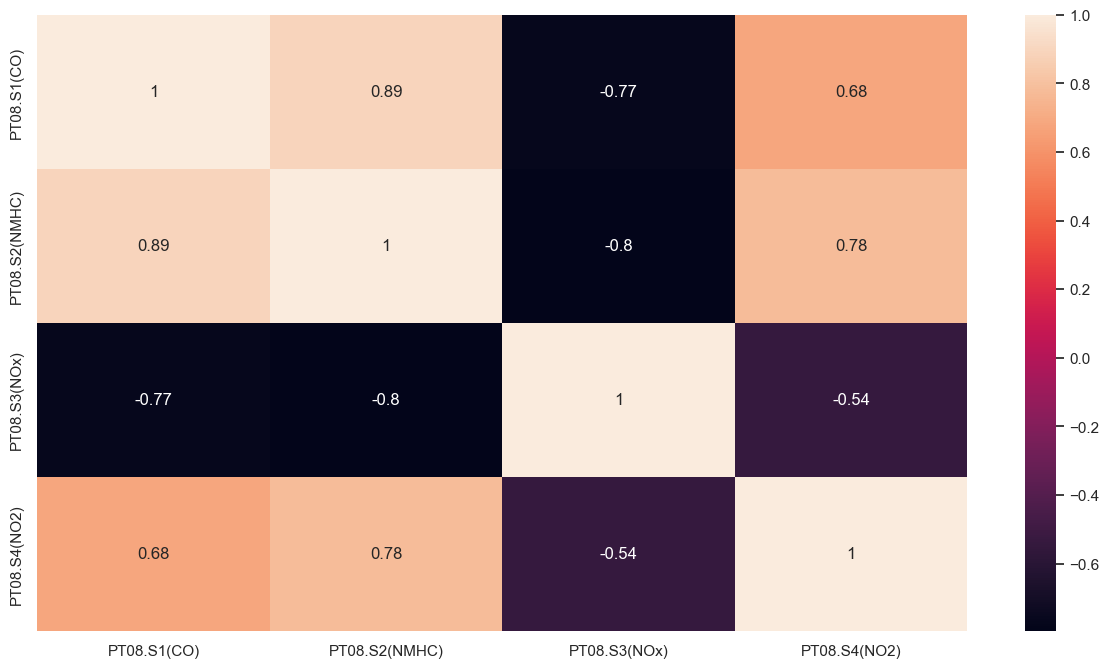

In [175]:
#correlations of metal oxide concentrations
metalCorr = df[metal_oxides_new].corr()
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(metalCorr, annot = True)
plt.show

In [176]:
metal_oxides_new2 = ['PT08.S1(CO)', 'PT08.S3(NOx)', 'PT08.S4(NO2)']
X = df[metal_oxides_new2]
y = df['AH']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)
model = LinearRegression()
model.fit(X_train, y_train)
print('Absolute humidity training score: ', model.score(X_train, y_train))

scores = cross_val_score(model, X_test, y_test, scoring='r2', cv=5)
print("Absolute humidity Linear Regression Model Accuracy using k-fold cross validation: " + str(np.mean(scores)))   

Absolute humidity training score:  0.5878509208359433
Absolute humidity Linear Regression Model Accuracy using k-fold cross validation: 0.5960364627726238


Here again, we see another drop. We can conclude that out of the three features, absolute humidity is the most correlated with the metal concentrations, but that none of temperature, relative humidity, nor absolute humidity are strong correlated with the metal oxide concentrations. As a result, improvements to the model are small, and in the future, can consider using a different set of features.

# Improvements on Models 2 and 3

Because these models utilize distance metrics, the first thing we can do to improve the models is scale. We will use the StandardScaler to scale all of our features and run the models again.

In [177]:
# use StandardScaler to normalize features
from sklearn.preprocessing import StandardScaler

#Model 2: Decision Tree
df_new = pd.DataFrame(StandardScaler().fit_transform(df[metal_oxides]), columns = metal_oxides)
df_new['CO(GT) Levels'] = df['CO(GT) Levels']
X_classfier_new = df_new[metal_oxides]
y_classifier_new = df_new['CO(GT) Levels']
incX2_new = X_classfier_new
incY2_new = y_classifier_new

best_depth = 1
best_accuracy = 0
best_acc_tr = 0
for k in range(1, 100):
    model = DecisionTreeClassifier(max_depth = k)

    kf = KFold(n_splits=5)
    errors = 0
    scorelist_train = []
    scorelist_test = []

    for train_index, test_index in kf.split(incX):
        Xc_train = incX2_new.iloc[train_index]
        yc_train = incY2_new.iloc[train_index]
        Xc_test = incX2_new.iloc[test_index]
        yc_test = incY2_new.iloc[test_index]
        
        model.fit(Xc_train, yc_train)
        dtree_pred_train = model.predict(Xc_train)
        dtree_pred_test = model.predict(Xc_test) 
        #print("Test Accuracy: ", accuracy_score(yc_test, dtree_pred_test))
        scorelist_train.append(accuracy_score(yc_train, dtree_pred_train))
        scorelist_test.append(accuracy_score(yc_test, dtree_pred_test))

    acc_train = np.mean(scorelist_train)
    acc_test = np.mean(scorelist_test)

    if acc_test > best_accuracy:
        best_accuracy = acc_test
        best_acc_tr = acc_train
        best_depth = k
print('Best Depth is: ', best_depth)
print('Best train accuracy is: ', best_acc_tr)
print('Best test accuracy is: ', best_accuracy)

Best Depth is:  2
Best train accuracy is:  0.9759269398178315
Best test accuracy is:  0.9727445901684277


In [178]:
#Model 3: K-Nearest  Neighbors
from sklearn.neighbors import KNeighborsClassifier

#Xc_train, Xc_test, yc_train, yc_test = train_test_split(X_classfier, y_classifier ,test_size = 0.2)
best_accuracy2 = 0
best_acc_tr2 = 0
best_split = k

knn = KNeighborsClassifier()
for k in range(2, 10):
    kf = KFold(n_splits=k)
    scorelist_train2 = []
    scorelist_test2 = []

    for train_index, test_index in kf.split(incX):
        Xc_train2 = incX2_new.iloc[train_index]
        yc_train2 = incY2_new.iloc[train_index]
        Xc_test2 = incX2_new.iloc[test_index]
        yc_test2 = incY2_new.iloc[test_index]
        
        knn.fit(Xc_train2, yc_train2)
        knn_pred_train = knn.predict(Xc_train2)
        knn_pred_test = knn.predict(Xc_test2) 
        #print("Test Accuracy: ", accuracy_score(yc_test, dtree_pred_test))
        scorelist_train2.append(accuracy_score(yc_train2, knn_pred_train))
        scorelist_test2.append(accuracy_score(yc_test2, knn_pred_test))

    acc_train2 = np.mean(scorelist_train2)
    acc_test2 = np.mean(scorelist_test2)

    if acc_test2 > best_accuracy2:
        best_accuracy2 = acc_test2
        best_acc_tr2 = acc_train2
        best_split = k
print('Best split is: ', best_split)
print('Best train accuracy is: ', best_acc_tr2)
print('Best test accuracy is: ', best_accuracy2)

Best split is:  3
Best train accuracy is:  0.9824730148551887
Best test accuracy is:  0.9744576253072567


We see that scaling did not help significantly improve the model. Since the model already has a high training and high test accuracy, it makes sense that the scaling may not cause a large change.

# Conclusion

After performing several data cleaning techniques such as removing missing values, converting provided dates to DateTime format, and converting numerical data to the appropriate format, we were able to use data visualizaton techniques learned in the course. We first created a heatmap to see which features were correlated. We fould that temperature, relative humidity, and absolute humidity, did not have a strong negative or positive correlation with the metal oxides. As epicted in the other visualizations such as the 3-D scatter plot, there is not much of a correletaion between these features.

Following the visualisations, we then used linear regression and K-Fold cross validation to see if there was a relationship between metal oxide concentrations in the air and temeperature, relative humidity, and absolute humidity. Based on the values acquired from computing the training and validation scores, we were able to deduce that our model recognizes that there may be a correlation between levels of these metal oxide concentrations and asbolute humidity in this Italian city since that linear regression model had the higher training and validation score. 

Using the DecisionTreeClassifier and the KNNClassifier, we also got high training and testing scores, indicating that our models perform well to generalize the relationship between these metal oxide cncentrations with temperature, relative humidity, and absolute humidity for the given datatset and for new data in this Italian city. 

Thus, to answer our question about whether the concentrations of metal oxides affect the temperature, relative humidity, and absolute humidity of this Italian city, we would say that it is less likely that these metal oxides play a significant role in the weather conditions of this Italian city. It is also important to note that this city is heavily polluted, and thus other factors may also significantly affect the environment and weather condition. Thus, more information about the city would be necessary to make a more concrete conclusion on the true effects of these metal oxide concentrations on the weather. 